# 02. Random Walk Model

**Mô hình:** Random Walk (RW)

**Công thức:** $\hat{y}_{t+1} = y_t$

**Metrics:** RMSFE, MAPE

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

# Add utils to path
sys.path.append(os.path.join('..', 'utils'))
from metrics import rmsfe, mape

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


Training set size: 112
Test set size: 28

Training data range: [0.0783, 0.4937]
Test data range: [0.3847, 0.7658]


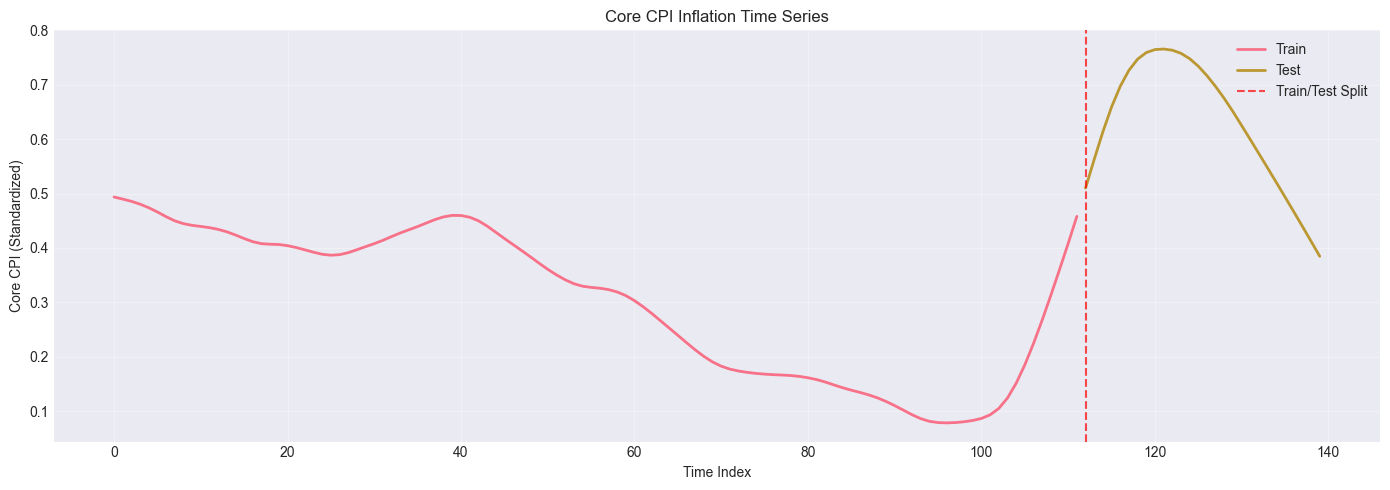

In [14]:
# Load processed data
train_df = pd.read_csv('../data/processed/train_clean.csv')
test_df = pd.read_csv('../data/processed/test_clean.csv')

# Extract target variable (Core CPI)
y_train = train_df['Core CPI'].values
y_test = test_df['Core CPI'].values

print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")
print(f"\nTraining data range: [{y_train.min():.4f}, {y_train.max():.4f}]")
print(f"Test data range: [{y_test.min():.4f}, {y_test.max():.4f}]")

# Visualize the time series
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_train)), y_train, label='Train', linewidth=2)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test', linewidth=2)
plt.axvline(x=len(y_train), color='red', linestyle='--', alpha=0.7, label='Train/Test Split')
plt.xlabel('Time Index')
plt.ylabel('Core CPI (Standardized)')
plt.title('Core CPI Inflation Time Series')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Random Walk Model Implementation
"""
Random Walk Model (Naive Forecast)
Formula: ŷ(t+1) = y(t)

The Random Walk model is a baseline econometric model where the forecast 
for the next period is simply the value from the current period.
This is often used as a benchmark for more sophisticated models.
"""

def random_walk_forecast(y_train, n_forecast):
    """
    Generate Random Walk forecasts
    
    Parameters:
    -----------
    y_train : array-like
        Training data (time series values)
    n_forecast : int
        Number of periods to forecast
    
    Returns:
    --------
    y_pred : numpy array
        Array of forecasted values
    """
    # In Random Walk, we forecast that each future value
    # will be equal to the last observed value
    last_value = y_train[-1]
    y_pred = np.full(n_forecast, last_value)
    
    return y_pred

# Generate predictions
print("Generating Random Walk forecasts...")
y_pred = random_walk_forecast(y_train, len(y_test))

print(f"\nRandom Walk Model:")
print(f"  Last training value: {y_train[-1]:.4f}")
print(f"  All {len(y_test)} test forecasts: {y_train[-1]:.4f}")
print(f"\nFirst 5 predictions: {y_pred[:5]}")
print(f"Last 5 predictions: {y_pred[-5:]}")

Generating Random Walk forecasts...

Random Walk Model:
  Last training value: 0.4581
  All 28 test forecasts: 0.4581

First 5 predictions: [0.45808118 0.45808118 0.45808118 0.45808118 0.45808118]
Last 5 predictions: [0.45808118 0.45808118 0.45808118 0.45808118 0.45808118]


In [16]:
# Model Evaluation

# Calculate metrics
rw_rmsfe = rmsfe(y_test, y_pred)
rw_mape = mape(y_test, y_pred)

print("="*70)
print("RANDOM WALK MODEL - EVALUATION RESULTS")
print("="*70)
print(f"RMSFE: {rw_rmsfe:.6f}")
print(f"MAPE:  {rw_mape:.4f}%")
print("="*70)

# Calculate residuals
residuals = y_test - y_pred

print(f"\nResiduals Summary Statistics:")
print(f"  Mean:     {residuals.mean():.6f}")
print(f"  Std Dev:  {residuals.std():.6f}")
print(f"  Min:      {residuals.min():.6f}")
print(f"  Max:      {residuals.max():.6f}")
print(f"  Median:   {np.median(residuals):.6f}")

RANDOM WALK MODEL - EVALUATION RESULTS
RMSFE: 0.207340
MAPE:  26.5870%

Residuals Summary Statistics:
  Mean:     0.170863
  Std Dev:  0.117455
  Min:      -0.073398
  Max:      0.307679
  Median:   0.196778


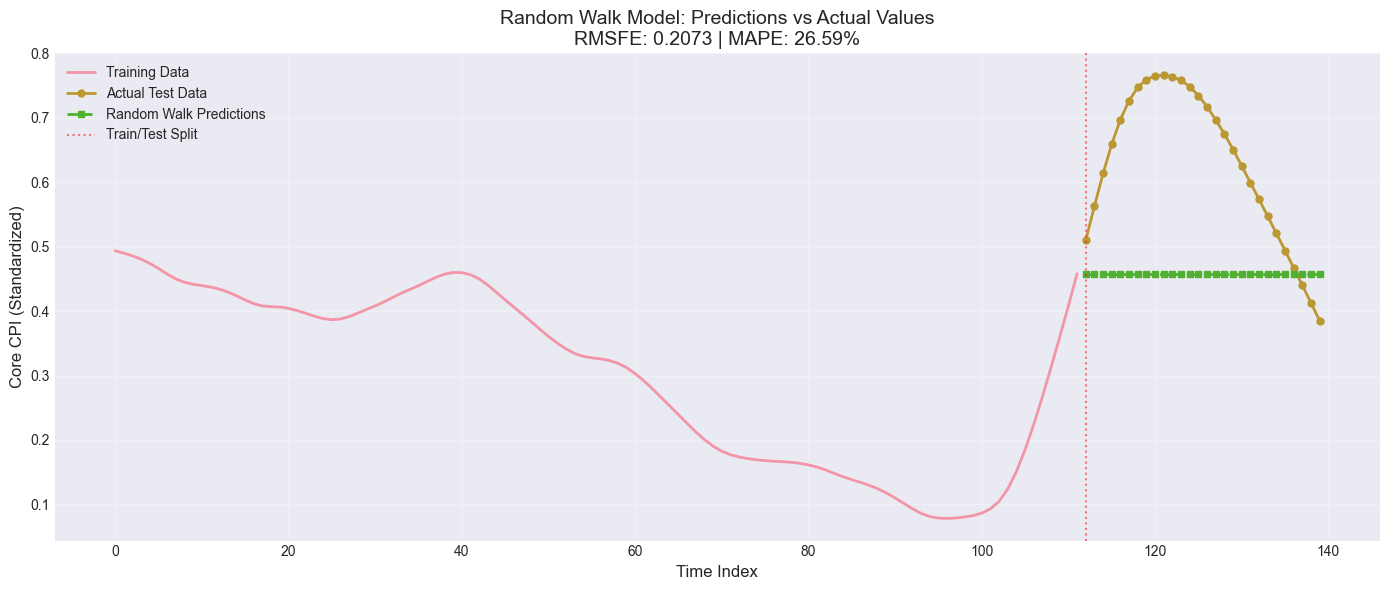

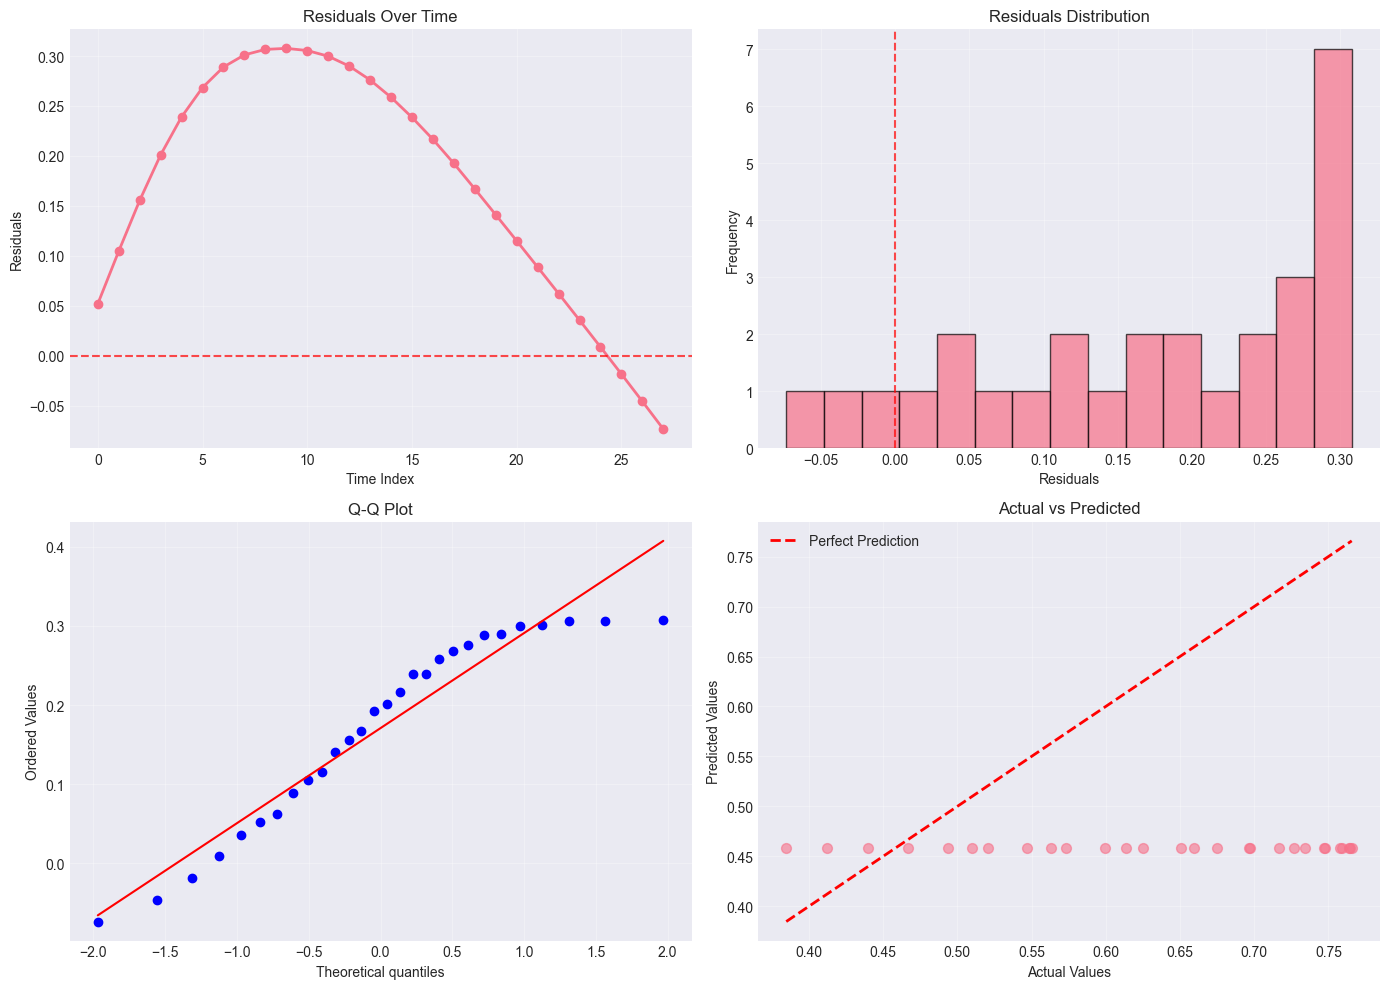

In [17]:
# Visualization

# Plot 1: Predictions vs Actual Values
plt.figure(figsize=(14, 6))

# Plot training data
plt.plot(range(len(y_train)), y_train, label='Training Data', 
         linewidth=2, alpha=0.7)

# Plot test data
test_indices = range(len(y_train), len(y_train) + len(y_test))
plt.plot(test_indices, y_test, label='Actual Test Data', 
         linewidth=2, marker='o', markersize=5)

# Plot predictions
plt.plot(test_indices, y_pred, label='Random Walk Predictions', 
         linewidth=2, linestyle='--', marker='s', markersize=5)

plt.axvline(x=len(y_train), color='red', linestyle=':', 
            alpha=0.5, label='Train/Test Split')
plt.xlabel('Time Index', fontsize=12)
plt.ylabel('Core CPI (Standardized)', fontsize=12)
plt.title(f'Random Walk Model: Predictions vs Actual Values\nRMSFE: {rw_rmsfe:.4f} | MAPE: {rw_mape:.2f}%', 
          fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/random_walk_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Residual Diagnostics
from scipy import stats

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residuals over time
axes[0, 0].plot(residuals, marker='o', linewidth=2)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_title('Residuals Over Time')
axes[0, 0].set_xlabel('Time Index')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True, alpha=0.3)

# Residuals histogram
axes[0, 1].hist(residuals, bins=15, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[0, 1].set_title('Residuals Distribution')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(True, alpha=0.3)

# Actual vs Predicted scatter
axes[1, 1].scatter(y_test, y_pred, alpha=0.6, s=50)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title('Actual vs Predicted')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/random_walk_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Save Results

# Create results directory if it doesn't exist
os.makedirs('../results/tables', exist_ok=True)
os.makedirs('../results/figures', exist_ok=True)

# Save predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
})
predictions_df.to_csv('../results/tables/random_walk_predictions.csv', index=False)
print("✓ Predictions saved to: ../results/tables/random_walk_predictions.csv")

# Save metrics summary
metrics_summary = pd.DataFrame({
    'Model': ['Random Walk'],
    'RMSFE': [rw_rmsfe],
    'MAPE': [rw_mape],
    'Description': ['Naive forecast: ŷ(t+1) = y(t)']
})
metrics_summary.to_csv('../results/tables/random_walk_metrics.csv', index=False)
print("✓ Metrics summary saved to: ../results/tables/random_walk_metrics.csv")

# Print summary
print("\n" + "="*70)
print("RANDOM WALK MODEL SUMMARY")
print("="*70)
print(metrics_summary.to_string(index=False))
print("="*70)

print("\n✅ Random Walk model training and evaluation completed successfully!")
print("\nNote: Random Walk is a baseline model. More sophisticated models")
print("should aim to achieve better RMSFE and MAPE scores than this benchmark.")

✓ Predictions saved to: ../results/tables/random_walk_predictions.csv
✓ Metrics summary saved to: ../results/tables/random_walk_metrics.csv

RANDOM WALK MODEL SUMMARY
      Model   RMSFE      MAPE                   Description
Random Walk 0.20734 26.587038 Naive forecast: ŷ(t+1) = y(t)

✅ Random Walk model training and evaluation completed successfully!

Note: Random Walk is a baseline model. More sophisticated models
should aim to achieve better RMSFE and MAPE scores than this benchmark.
